In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv("./Dataset/Train/Train_Data.csv")
df_test = pd.read_csv("./Dataset/Test/Test_Data.csv")
df_sample = pd.read_csv("./Dataset/Test/Sample_House_Price_Submission_File.csv")

# Data Cleaning

### Train Data Cleaning

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
Id               1100 non-null int64
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
Alley            69 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-nu

In [5]:
# Removing Not Useful Columns from the Dataset
not_useful = ['Alley','MiscFeature','PoolQC','FireplaceQu','Fence','Id']
train_data_clean = df_train.drop(columns=not_useful)

In [6]:
def getMaxInTrainColumn(fkey):
    d = {}
    for i in train_data_clean[fkey].values:
        if d.get(i) is not None:
            d[i] += 1
        else:
            d[i] = 1
    
    return max(d,key=d.get)

getMaxInTrainColumn('GarageType')

'Attchd'

In [7]:
train_data_clean['GarageType'] = train_data_clean['GarageType'].fillna(value=getMaxInTrainColumn('GarageType'))

In [8]:
train_data_clean['GarageYrBlt'] = train_data_clean['GarageYrBlt'].fillna(train_data_clean['GarageYrBlt'].mean())

In [9]:
getMaxInTrainColumn('GarageFinish')

'Unf'

In [10]:
train_data_clean['GarageFinish'] = train_data_clean['GarageFinish'].fillna(value=getMaxInTrainColumn('GarageFinish'))

In [11]:
getMaxInTrainColumn('GarageQual')

'TA'

In [12]:
train_data_clean['GarageQual'] = train_data_clean['GarageQual'].fillna(value=getMaxInTrainColumn('GarageQual'))

In [13]:
train_data_clean['GarageCond'] = train_data_clean['GarageCond'].fillna(value=getMaxInTrainColumn("GarageCond"))

In [14]:
getMaxInTrainColumn("MasVnrType")

'None'

In [15]:
train_data_clean['MasVnrType'] = train_data_clean['MasVnrType'].fillna(value=getMaxInTrainColumn("MasVnrType"))

In [16]:
train_data_clean['MasVnrArea'] = train_data_clean['MasVnrArea'].fillna(int(train_data_clean['MasVnrArea'].mean()))

In [17]:
getMaxInTrainColumn("BsmtQual")

'Gd'

In [18]:
train_data_clean['BsmtQual'] = train_data_clean["BsmtQual"].fillna(value=getMaxInTrainColumn("BsmtQual"))

In [19]:
getMaxInTrainColumn("BsmtCond")

'TA'

In [20]:
train_data_clean['BsmtCond'] = train_data_clean["BsmtCond"].fillna(value=getMaxInTrainColumn("BsmtCond"))

In [21]:
getMaxInTrainColumn("BsmtExposure")

'No'

In [22]:
train_data_clean['BsmtExposure'] = train_data_clean['BsmtExposure'].fillna(value=getMaxInTrainColumn("BsmtExposure"))

In [23]:
getMaxInTrainColumn("BsmtFinType1")

'GLQ'

In [24]:
train_data_clean['BsmtFinType1'] = train_data_clean['BsmtFinType1'].fillna(value=getMaxInTrainColumn("BsmtFinType1"))

In [25]:
getMaxInTrainColumn("BsmtFinType2")

'Unf'

In [26]:
train_data_clean['BsmtFinType2'] = train_data_clean['BsmtFinType2'].fillna(value=getMaxInTrainColumn("BsmtFinType2"))

In [27]:
train_data_clean['LotFrontage'] = train_data_clean['LotFrontage'].fillna(int(train_data_clean['LotFrontage'].mean()))

In [28]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 75 columns):
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      1100 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1100 no

In [29]:
le = LabelEncoder()

In [30]:
train_data_clean['MSZoning'] = le.fit_transform(train_data_clean['MSZoning'])

In [31]:
train_data_clean['Street'] = le.fit_transform(train_data_clean['Street'])

In [32]:
train_data_clean['LotShape'] = le.fit_transform(train_data_clean['LotShape'])

In [33]:
train_data_clean['LandContour'] = le.fit_transform(train_data_clean['LandContour'])

In [34]:
train_data_clean['Utilities'] = le.fit_transform(train_data_clean['Utilities'])

In [35]:
train_data_clean['LotConfig'] = le.fit_transform(train_data_clean['LotConfig'])

In [36]:
train_data_clean['LandSlope'] = le.fit_transform(train_data_clean['LandSlope'])

In [37]:
train_data_clean['Neighborhood'] = le.fit_transform(train_data_clean['Neighborhood'])

In [38]:
train_data_clean['Condition1'] = le.fit_transform(train_data_clean['Condition1'])

In [39]:
train_data_clean['Condition2'] = le.fit_transform(train_data_clean['Condition2'])

In [40]:
train_data_clean['BldgType'] = le.fit_transform(train_data_clean['BldgType'])

In [41]:
train_data_clean['HouseStyle'] = le.fit_transform(train_data_clean['HouseStyle'])

In [42]:
train_data_clean['RoofStyle'] = le.fit_transform(train_data_clean['RoofStyle'])

In [43]:
train_data_clean['RoofMatl'] = le.fit_transform(train_data_clean['RoofMatl'])

In [44]:
train_data_clean['Exterior1st'] = le.fit_transform(train_data_clean['Exterior1st'])

In [45]:
train_data_clean['Exterior2nd'] = le.fit_transform(train_data_clean['Exterior2nd'])

In [46]:
train_data_clean['MasVnrType'] = le.fit_transform(train_data_clean['MasVnrType'])

In [47]:
train_data_clean['ExterQual'] = le.fit_transform(train_data_clean['ExterQual'])

In [48]:
train_data_clean['ExterCond'] = le.fit_transform(train_data_clean['ExterCond'])

In [49]:
train_data_clean['Foundation'] = le.fit_transform(train_data_clean['Foundation'])

In [50]:
train_data_clean['BsmtCond'] = le.fit_transform(train_data_clean['BsmtCond'])

In [51]:
train_data_clean['BsmtExposure'] = le.fit_transform(train_data_clean['BsmtExposure'])

In [52]:
train_data_clean['BsmtFinType1'] = le.fit_transform(train_data_clean['BsmtFinType1'])

In [53]:
train_data_clean['BsmtQual'] = le.fit_transform(train_data_clean['BsmtQual'])

In [54]:
train_data_clean['Heating'] = le.fit_transform(train_data_clean['Heating'])

In [55]:
train_data_clean['HeatingQC'] = le.fit_transform(train_data_clean['HeatingQC'])

In [56]:
train_data_clean['CentralAir'] = le.fit_transform(train_data_clean['CentralAir'])

In [57]:
train_data_clean['Electrical'] = le.fit_transform(train_data_clean['Electrical'])

In [58]:
train_data_clean['KitchenQual'] = le.fit_transform(train_data_clean['KitchenQual'])

In [59]:
train_data_clean['Functional'] = le.fit_transform(train_data_clean['Functional'])

In [60]:
train_data_clean['GarageType'] = le.fit_transform(train_data_clean['GarageType'])

In [61]:
train_data_clean['GarageFinish'] = le.fit_transform(train_data_clean['GarageFinish'])

In [62]:
train_data_clean['PavedDrive'] = le.fit_transform(train_data_clean['PavedDrive'])

In [63]:
train_data_clean['GarageCond'] = le.fit_transform(train_data_clean['GarageCond'])

In [64]:
train_data_clean['GarageQual'] = le.fit_transform(train_data_clean['GarageQual'])

In [65]:
train_data_clean['SaleCondition'] = le.fit_transform(train_data_clean['SaleCondition'])

In [66]:
train_data_clean['SaleType'] = le.fit_transform(train_data_clean['SaleType'])

In [67]:
train_data_clean['BsmtFinType2'] = le.fit_transform(train_data_clean['BsmtFinType2'])

In [68]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 75 columns):
MSSubClass       1100 non-null int64
MSZoning         1100 non-null int64
LotFrontage      1100 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null int64
LotShape         1100 non-null int64
LandContour      1100 non-null int64
Utilities        1100 non-null int64
LotConfig        1100 non-null int64
LandSlope        1100 non-null int64
Neighborhood     1100 non-null int64
Condition1       1100 non-null int64
Condition2       1100 non-null int64
BldgType         1100 non-null int64
HouseStyle       1100 non-null int64
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null int64
RoofMatl         1100 non-null int64
Exterior1st      1100 non-null int64
Exterior2nd      1100 non-null int64
MasVnrType       1100 non-null int64
Mas

### Test Data Cleaning

In [69]:
# Removing Not Useful Columns from the Dataset
not_useful = ['Alley','MiscFeature','PoolQC','FireplaceQu','Fence','Id']
test_data_clean = df_test.drop(columns=not_useful)

In [70]:
def getMaxInTestColumn(fkey):
    d = {}
    for i in test_data_clean[fkey].values:
        if d.get(i) is not None:
            d[i] += 1
        else:
            d[i] = 1
    
    return max(d,key=d.get)

getMaxInTestColumn('GarageType')

'Attchd'

In [71]:
test_data_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,30,RL,60.0,8400,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,2009,WD,Normal
1,20,RL,61.0,9758,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2007,WD,Normal
2,20,RL,70.0,7000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,16,0,0,0,0,0,4,2007,WD,Family
3,20,RL,79.0,8910,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,192,0,0,0,0,7,2006,WD,Normal
4,160,RM,24.0,2016,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2007,WD,Normal


In [72]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 74 columns):
MSSubClass       360 non-null int64
MSZoning         360 non-null object
LotFrontage      293 non-null float64
LotArea          360 non-null int64
Street           360 non-null object
LotShape         360 non-null object
LandContour      360 non-null object
Utilities        360 non-null object
LotConfig        360 non-null object
LandSlope        360 non-null object
Neighborhood     360 non-null object
Condition1       360 non-null object
Condition2       360 non-null object
BldgType         360 non-null object
HouseStyle       360 non-null object
OverallQual      360 non-null int64
OverallCond      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null object
RoofMatl         360 non-null object
Exterior1st      360 non-null object
Exterior2nd      360 non-null object
MasVnrType       358 non-null object
MasVnrArea  

In [73]:
test_data_clean['GarageType'] = test_data_clean['GarageType'].fillna(value=getMaxInTestColumn('GarageType'))

In [74]:
test_data_clean['GarageYrBlt'] = test_data_clean['GarageYrBlt'].fillna(test_data_clean['GarageYrBlt'].mean())

In [75]:
getMaxInTestColumn('GarageFinish')

'Unf'

In [76]:
test_data_clean['GarageFinish'] = test_data_clean['GarageFinish'].fillna(value=getMaxInTestColumn('GarageFinish'))

In [77]:
getMaxInTestColumn('GarageQual')

'TA'

In [78]:
test_data_clean['GarageQual'] = test_data_clean['GarageQual'].fillna(value=getMaxInTestColumn('GarageQual'))

In [79]:
test_data_clean['GarageCond'] = test_data_clean['GarageCond'].fillna(value=getMaxInTestColumn("GarageCond"))

In [80]:
getMaxInTestColumn("MasVnrType")

'None'

In [81]:
test_data_clean['MasVnrType'] = test_data_clean['MasVnrType'].fillna(value=getMaxInTestColumn("MasVnrType"))

In [82]:
test_data_clean['MasVnrArea'] = test_data_clean['MasVnrArea'].fillna(int(test_data_clean['MasVnrArea'].mean()))

In [83]:
getMaxInTestColumn("BsmtQual")

'TA'

In [84]:
test_data_clean['BsmtQual'] = test_data_clean["BsmtQual"].fillna(value=getMaxInTestColumn("BsmtQual"))

In [85]:
getMaxInTestColumn("BsmtCond")

'TA'

In [86]:
test_data_clean['BsmtCond'] = test_data_clean["BsmtCond"].fillna(value=getMaxInTestColumn("BsmtCond"))

In [87]:
getMaxInTestColumn("BsmtExposure")

'No'

In [88]:
test_data_clean['BsmtExposure'] = test_data_clean['BsmtExposure'].fillna(value=getMaxInTestColumn("BsmtExposure"))

In [89]:
getMaxInTestColumn("BsmtFinType1")

'Unf'

In [90]:
test_data_clean['BsmtFinType1'] = test_data_clean['BsmtFinType1'].fillna(value=getMaxInTestColumn("BsmtFinType1"))

In [91]:
getMaxInTestColumn("BsmtFinType2")

'Unf'

In [92]:
test_data_clean['BsmtFinType2'] = test_data_clean['BsmtFinType2'].fillna(value=getMaxInTestColumn("BsmtFinType2"))

In [93]:
test_data_clean['LotFrontage'] = test_data_clean['LotFrontage'].fillna(int(test_data_clean['LotFrontage'].mean()))

In [94]:
test_data_clean['Electrical'] = test_data_clean['Electrical'].fillna(value=getMaxInTestColumn("Electrical"))

In [95]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 74 columns):
MSSubClass       360 non-null int64
MSZoning         360 non-null object
LotFrontage      360 non-null float64
LotArea          360 non-null int64
Street           360 non-null object
LotShape         360 non-null object
LandContour      360 non-null object
Utilities        360 non-null object
LotConfig        360 non-null object
LandSlope        360 non-null object
Neighborhood     360 non-null object
Condition1       360 non-null object
Condition2       360 non-null object
BldgType         360 non-null object
HouseStyle       360 non-null object
OverallQual      360 non-null int64
OverallCond      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null object
RoofMatl         360 non-null object
Exterior1st      360 non-null object
Exterior2nd      360 non-null object
MasVnrType       360 non-null object
MasVnrArea  

In [96]:
test_data_clean['MSZoning'] = le.fit_transform(test_data_clean['MSZoning'])
test_data_clean['Street'] = le.fit_transform(test_data_clean['Street'])
test_data_clean['LotShape'] = le.fit_transform(test_data_clean['LotShape'])
test_data_clean['LandContour'] = le.fit_transform(test_data_clean['LandContour'])
test_data_clean['Utilities'] = le.fit_transform(test_data_clean['Utilities'])
test_data_clean['LotConfig'] = le.fit_transform(test_data_clean['LotConfig'])
test_data_clean['LandSlope'] = le.fit_transform(test_data_clean['LandSlope'])
test_data_clean['Neighborhood'] = le.fit_transform(test_data_clean['Neighborhood'])
test_data_clean['Condition1'] = le.fit_transform(test_data_clean['Condition1'])
test_data_clean['Condition2'] = le.fit_transform(test_data_clean['Condition2'])
test_data_clean['BldgType'] = le.fit_transform(test_data_clean['BldgType'])
test_data_clean['HouseStyle'] = le.fit_transform(test_data_clean['HouseStyle'])
test_data_clean['RoofStyle'] = le.fit_transform(test_data_clean['RoofStyle'])
test_data_clean['RoofMatl'] = le.fit_transform(test_data_clean['RoofMatl'])
test_data_clean['Exterior1st'] = le.fit_transform(test_data_clean['Exterior1st'])
test_data_clean['Exterior2nd'] = le.fit_transform(test_data_clean['Exterior2nd'])
test_data_clean['MasVnrType'] = le.fit_transform(test_data_clean['MasVnrType'])
test_data_clean['ExterQual'] = le.fit_transform(test_data_clean['ExterQual'])
test_data_clean['ExterCond'] = le.fit_transform(test_data_clean['ExterCond'])
test_data_clean['Foundation'] = le.fit_transform(test_data_clean['Foundation'])
test_data_clean['BsmtCond'] = le.fit_transform(test_data_clean['BsmtCond'])
test_data_clean['BsmtExposure'] = le.fit_transform(test_data_clean['BsmtExposure'])
test_data_clean['BsmtFinType1'] = le.fit_transform(test_data_clean['BsmtFinType1'])
test_data_clean['BsmtQual'] = le.fit_transform(test_data_clean['BsmtQual'])
test_data_clean['Heating'] = le.fit_transform(test_data_clean['Heating'])
test_data_clean['HeatingQC'] = le.fit_transform(test_data_clean['HeatingQC'])
test_data_clean['CentralAir'] = le.fit_transform(test_data_clean['CentralAir'])
test_data_clean['Electrical'] = le.fit_transform(test_data_clean['Electrical'])
test_data_clean['KitchenQual'] = le.fit_transform(test_data_clean['KitchenQual'])
test_data_clean['Functional'] = le.fit_transform(test_data_clean['Functional'])
test_data_clean['GarageType'] = le.fit_transform(test_data_clean['GarageType'])
test_data_clean['GarageFinish'] = le.fit_transform(test_data_clean['GarageFinish'])
test_data_clean['PavedDrive'] = le.fit_transform(test_data_clean['PavedDrive'])
test_data_clean['GarageCond'] = le.fit_transform(test_data_clean['GarageCond'])
test_data_clean['GarageQual'] = le.fit_transform(test_data_clean['GarageQual'])
test_data_clean['SaleCondition'] = le.fit_transform(test_data_clean['SaleCondition'])
test_data_clean['SaleType'] = le.fit_transform(test_data_clean['SaleType'])
test_data_clean['BsmtFinType2'] = le.fit_transform(test_data_clean['BsmtFinType2'])

In [97]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 74 columns):
MSSubClass       360 non-null int64
MSZoning         360 non-null int64
LotFrontage      360 non-null float64
LotArea          360 non-null int64
Street           360 non-null int64
LotShape         360 non-null int64
LandContour      360 non-null int64
Utilities        360 non-null int64
LotConfig        360 non-null int64
LandSlope        360 non-null int64
Neighborhood     360 non-null int64
Condition1       360 non-null int64
Condition2       360 non-null int64
BldgType         360 non-null int64
HouseStyle       360 non-null int64
OverallQual      360 non-null int64
OverallCond      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null int64
RoofMatl         360 non-null int64
Exterior1st      360 non-null int64
Exterior2nd      360 non-null int64
MasVnrType       360 non-null int64
MasVnrArea       360 non-null

---

### Splitting Data into X_train and Y_train

In [98]:
X_train = train_data_clean[train_data_clean.columns.difference(['SalePrice'])]
Y_train = train_data_clean[['SalePrice']]

In [99]:
X_test = test_data_clean[test_data_clean.columns]

In [100]:
X_train.shape

(1100, 74)

In [101]:
X_test.shape

(360, 74)

# Using Multivariate Regression

In [102]:
def hypothesis(x,theta):
    return np.dot(x,theta.T)

def error(X,Y,theta):
    m = Y.shape[0]
    err = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        err += (hx-Y[i])**2
        
    return err/2

def gradient(X,Y,theta):
    grad = np.zeros((X.shape[1],))
    m = Y.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j] += ((Y[i]-hx)*X[i][j])
    
    return grad*0.5

def batch_gradient(X,Y,theta,batch_size=1):
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((X.shape[1],1))
    
    for i in indices:
        hx = hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j] += ((Y[i] - hx)*X[i][j])
            
    return grad*0.5


def gradientDescent(X,Y,learning_rate=0.000000000011):
    theta = np.zeros((X.shape[1],))
    
    e = error(X,Y,theta)
    de = e
    error_list = [e]
    itr = 0
    
    while(itr<=100):
        grad = gradient(X,Y,theta)
        for j in range(X.shape[1]):
            theta[j] = theta[j] + learning_rate*grad[j]
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne - e
        e = ne
        itr += 1
        
    return theta,error_list

In [103]:
data_train = train_data_clean.values

In [104]:
x_train = data_train[:,:-1]
y_train = data_train[:,-1]

In [105]:
data_test = test_data_clean.values

In [106]:
x_test = data_test[:,:]

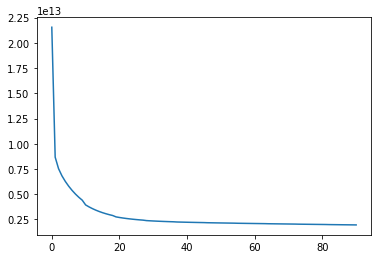

In [107]:
final_theta,error_list = gradientDescent(x_train,y_train)
plt.plot(error_list)
plt.show()

In [108]:
hyp = hypothesis(X_test,final_theta).reshape(-1,1)

In [109]:
ids = np.array(df_test['Id']).reshape(-1,1)

In [110]:
result = np.hstack((ids,hyp))
result = result.astype('int64')

In [111]:
df = pd.DataFrame(result,columns=['Id','SalePrice'])

In [112]:
df.to_csv("./Dataset/submission1.csv",index=False)

In [113]:
df = pd.read_csv("./Dataset/submission1.csv")

In [114]:
df

,Id,SalePrice
0,1101,127678
1,1102,160530
2,1103,167235
3,1104,165249
4,1105,156740
5,1106,232590
6,1107,183641
7,1108,206468
8,1109,182602
9,1110,220043


## Using Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
gb_reg = GradientBoostingRegressor(learning_rate=0.1,n_estimators=500,max_features=10)

In [117]:
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=10,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [118]:
hyp2 = gb_reg.predict(x_test).reshape(-1,1)

In [119]:
result2 = np.hstack((ids,hyp2))
result2 = result2.astype('int64')

In [120]:
df = pd.DataFrame(result2,columns=['Id','SalePrice'])

In [121]:
df.to_csv("./Dataset/submission2.csv",index=False)

## Using Decision Tree

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
dt_reg = DecisionTreeRegressor()

In [124]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
hyp3 = dt_reg.predict(x_test).reshape(-1,1)

In [126]:
result3 = np.hstack((ids,hyp3))
result3 = result3.astype('int64')

In [127]:
df = pd.DataFrame(result3,columns=['Id','SalePrice'])

In [128]:
df.to_csv("./Dataset/submission3.csv",index=False)

## Using Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
rf_reg = RandomForestRegressor(n_estimators=100)

In [131]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [132]:
hyp4 = rf_reg.predict(x_test).reshape(-1,1)

In [133]:
result4 = np.hstack((ids,hyp4))
result4 = result4.astype('int64')

In [134]:
df = pd.DataFrame(result4,columns=['Id','SalePrice'])

In [135]:
df.to_csv("./Dataset/submission4.csv",index=False)